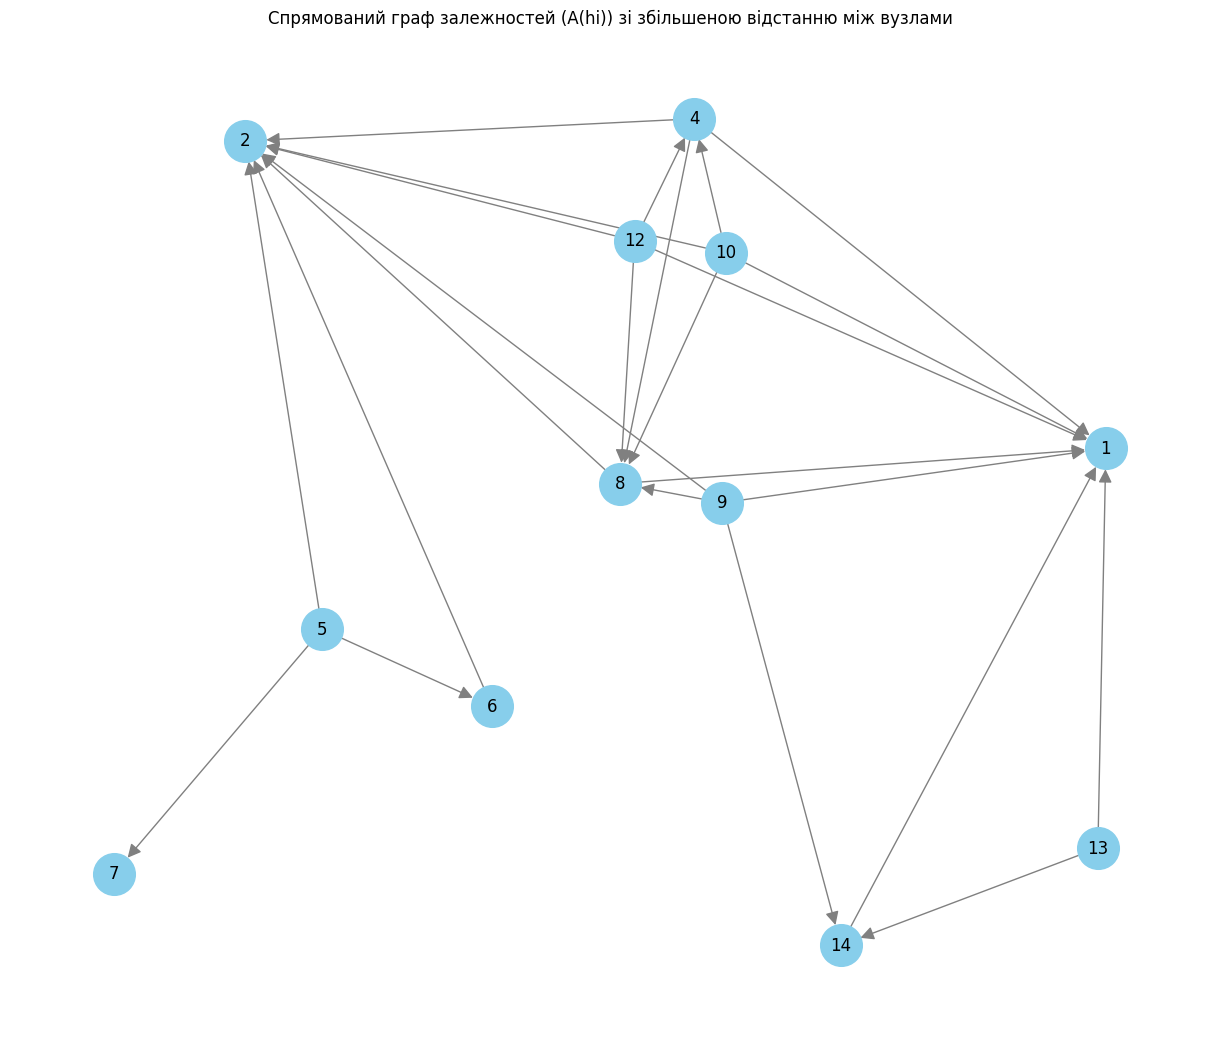

,1,2,4,5,6,7,8,9,10,12,13,14
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,0,0
5,0,1,0,0,1,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,1,0,0,0,0,1
10,1,1,1,0,0,0,1,0,0,0,0,0
12,1,1,1,0,0,0,1,0,0,0,0,0


In [19]:
# Перестворюємо граф після скидання стану
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Визначимо ребра згідно з залежностями (A(hi)) з 1-ї ітерації
edges = [
    (4, 1), (8, 1), (9, 1), (10, 1), (12, 1), (13, 1), (14, 1),     # A(1)
    (4, 2), (5, 2), (6, 2), (8, 2), (9, 2), (10, 2), (12, 2),      # A(2)
    (10, 4), (12, 4),                                             # A(4)
    (5, 6),                                                       # A(6)
    (5, 7),                                                       # A(7)
    (4, 8), (9, 8), (10, 8), (12, 8),                              # A(8)
    (9, 14), (13, 14)                                             # A(14)
]

# Створимо орієнтований граф
G = nx.DiGraph()
G.add_edges_from(edges)

# Малюємо граф
plt.figure(figsize=(12, 10)) # Збільшуємо розмір фігури для кращої візуалізації
# Використовуємо spring_layout зі збільшеним параметром k
# k - це оптимальна відстань між вузлами. Більше k - вузли далі один від одного.
# Можна експериментувати зі значенням k для отримання бажаного результату
pos = nx.spring_layout(G, seed=42, k=0.8) # Збільшено k, наприклад, до 0.8
nx.draw(G, pos, with_labels=True, node_size=900, node_color='skyblue', edge_color='gray', font_size=12, arrows=True, arrowstyle='-|>', arrowsize=20)
plt.title("Спрямований граф залежностей (A(hi)) зі збільшеною відстанню між вузлами")
plt.axis('off')
plt.show()

# Побудуємо матрицю досяжності (використовуючи алгоритм Флойда-Уоршелла)
nodes = sorted(G.nodes())
reach_matrix = pd.DataFrame(0, index=nodes, columns=nodes)

# Знаходимо всі шляхи
for i in nodes:
    reachable = nx.descendants(G, i)
    for j in reachable:
        reach_matrix.at[i, j] = 1

reach_matrix
